In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso



# **TASK-1**

**MOUNT WITH DRIVE**


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
file_path="/content/hotel_bookings.csv"
df= pd.read_csv(file_path)

 **DISPLAY FISRT 5**

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**OVERVIEW OF DATAFRAME**

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **DATA CLEANING**

**checking for missing (null or NaN) values**

In [29]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


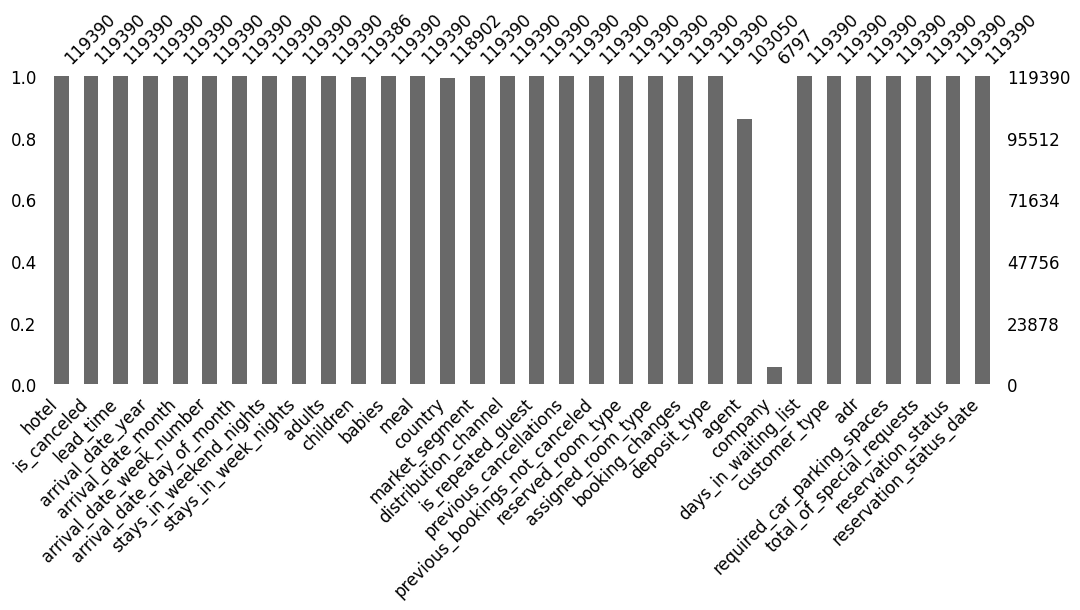

In [32]:
plt.figure(figsize=(27,4))
axz=plt.subplot(1,2,2)
mso.bar(df, ax=axz,fontsize=12);

In [33]:
# Droping rows where 'children' is missing because they are less (4)
df = df.dropna(subset=['children'])


In [34]:
# Fill row where  "country" is missing with unknown
df['country'] = df['country'].fillna('Unknown')
#fill row where "agent" & "comapany" with mode
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])
df['company'] = df['company'].fillna(df['company'].mode()[0])

In [35]:
#checking after sorting everytihng
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

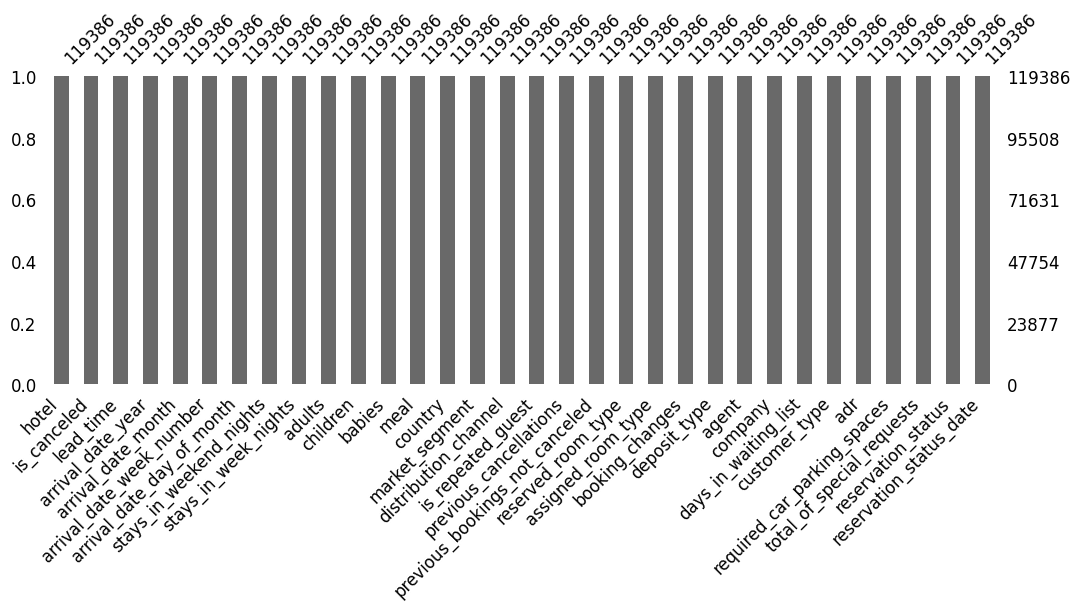

In [36]:
plt.figure(figsize=(27,4))
axz=plt.subplot(1,2,2)
mso.bar(df, ax=axz,fontsize=12);

# **DUPLICATE VALUES**

In [39]:
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", df[duplicates].shape[0])
print(df[duplicates])




Number of Duplicate Rows: 0
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]


**DELETE DUPLICATE VALUES**

In [38]:
#note: there was no duplicate values in this dataset
df = df.drop_duplicates()

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,240.0,223.0,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,240.0,223.0,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,240.0,223.0,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,223.0,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,223.0,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,Resort Hotel,0,0,2016,November,48,24,0,1,1.0,...,No Deposit,240.0,329.0,0.0,Transient,44.00,0.0,1.0,Check-Out,2016-11-25
14679,Resort Hotel,0,0,2017,April,16,18,0,1,1.0,...,No Deposit,240.0,329.0,0.0,Transient,74.00,0.0,1.0,Check-Out,2017-04-19
14680,Resort Hotel,1,399,2015,December,52,22,0,1,2.0,...,No Deposit,240.0,223.0,0.0,Transient,36.00,0.0,0.0,Canceled,2015-01-01
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2.0,...,No Deposit,156.0,223.0,0.0,Contract,90.95,0.0,0.0,Canceled,2015-01-01


# **DATA CONSISTENCY**

In [ ]:
data_types = df.dtypes
data_types

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,float64


# **IMPROVING THE FORMATING**

**Convert numeric-like IDs to string**

In [ ]:
df['agent'] = df['agent'].astype(str)
df['company'] = df['company'].astype(str)


**Clean text columns (like “country”)**

In [ ]:
df['country'] = df['country'].str.strip().str.title()


**Verify formatting**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,240.0,223.0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,240.0,223.0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,240.0,223.0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,223.0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,223.0,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14678,Resort Hotel,0,0,2016,November,48,24,0,1,1.0,...,No Deposit,240.0,329.0,0.0,Transient,44.00,0.0,1.0,Check-Out,2016-11-25
14679,Resort Hotel,0,0,2017,April,16,18,0,1,1.0,...,No Deposit,240.0,329.0,0.0,Transient,74.00,0.0,1.0,Check-Out,2017-04-19
14680,Resort Hotel,1,399,2015,December,52,22,0,1,2.0,...,No Deposit,240.0,223.0,0.0,Transient,36.00,0.0,0.0,Canceled,2015-01-01
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2.0,...,No Deposit,156.0,223.0,0.0,Contract,90.95,0.0,0.0,Canceled,2015-01-01
14682,Resort Hotel,1,259,2015,September,38,17,0,3,2.0,...,Non Refund,240.0,223.0,0.0,Transient,40.05,0.0,0.0,Canceled,2015-01-21


In [ ]:
data_types = df.dtypes
data_types

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,float64


# **TASK-2**

**STATISTIC**

In [ ]:
print(df.describe())
#This command in Pandas gives you a quick statistical summary of all the numerical columns in your dataset

        is_canceled     lead_time  arrival_date_year  \
count  11467.000000  11467.000000       11467.000000   
mean       0.664516    106.215575        2016.015523   
std        0.472180     97.494359           0.770059   
min        0.000000      0.000000        2015.000000   
25%        0.000000     27.000000        2015.000000   
50%        1.000000     77.000000        2016.000000   
75%        1.000000    166.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              11467.000000               11467.000000   
mean                  28.963635                  15.944362   
std                   12.351662                   8.950864   
min                    1.000000                   1.000000   
25%                   20.000000                   8.000000   
50%                   30.000000                  16.000000   
75%                   38.000000                  24.000000   

In [ ]:
print(df.describe(include='object'))
#this is for categorical columns


               hotel arrival_date_month   meal country market_segment  \
count          11467              11467  11467   11467          11467   
unique             1                 12      5      87              6   
top     Resort Hotel               July     BB     Prt      Online TA   
freq           11467               1936   8929    5926           6736   

       distribution_channel reserved_room_type assigned_room_type  \
count                 11467              11467              11467   
unique                    4                  9                 11   
top                   TA/TO                  A                  A   
freq                   8814               6080               4860   

       deposit_type  agent company customer_type reservation_status  \
count         11467  11467   11467         11467              11467   
unique            3    129     117             4                  3   
top      No Deposit  240.0   223.0     Transient           Canceled   
freq

In [ ]:
print("Mean:", df['adr'].mean())
print("Median:", df['adr'].median())
print("Max:", df['adr'].max())
print("Min:", df['adr'].min())
#this code was NOT necessary as this provide average mean,median,max and min of column adr(average daily rate).
#we choose adr only because this column contain  main info about are data .

Mean: 108.23273044388245
Median: 89.0
Max: 450.0
Min: 0.0


**Identify Outliers**

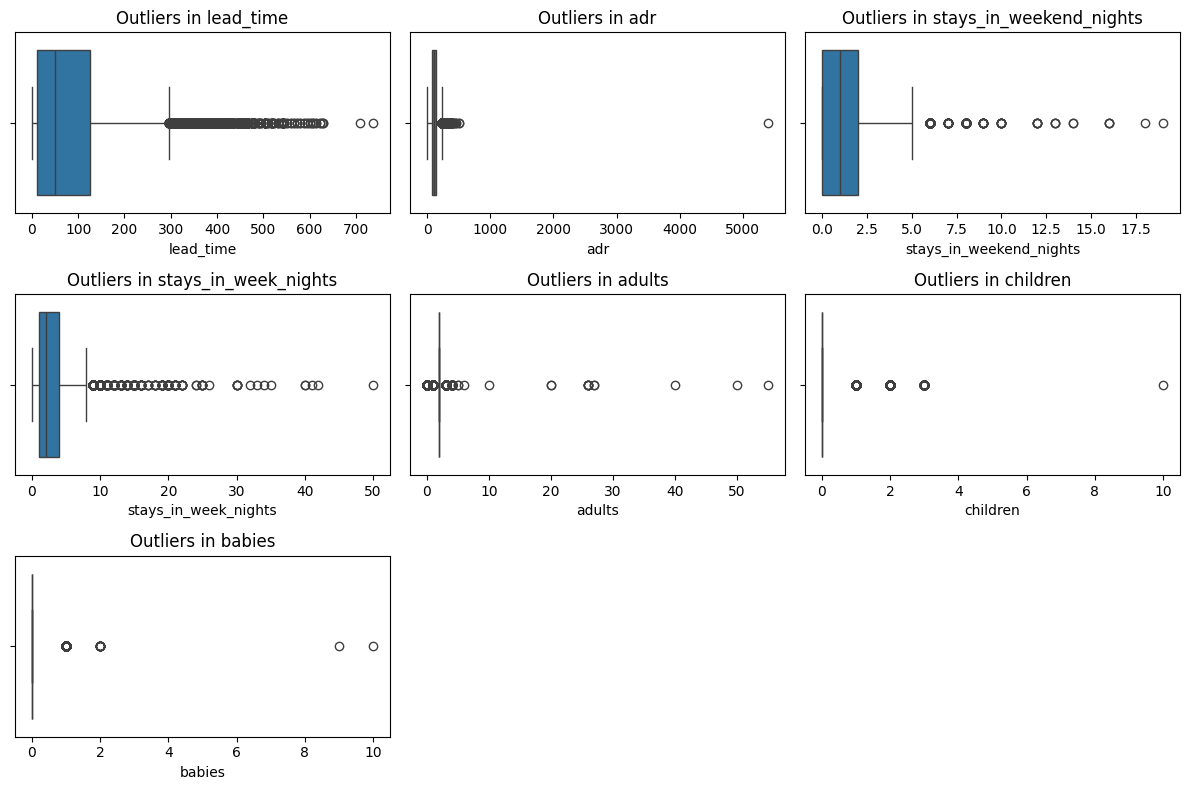

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
#this code helps you to It helps you visually detect outliers (the small circles far from the main box).
# List of numerical columns in your dataset
numerical_features = ['lead_time', 'adr', 'stays_in_weekend_nights',
                      'stays_in_week_nights', 'adults', 'children', 'babies']

# Create figure
plt.figure(figsize=(12, 8))

# Loop through each column and make boxplots
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of plots
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


**Correlations**

Correlation Matrix:
                                 is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.184881           0.088182   
lead_time                          0.184881   1.000000           0.139089   
arrival_date_year                  0.088182   0.139089           1.000000   
arrival_date_week_number           0.001408   0.101161          -0.514230   
arrival_date_day_of_month          0.005407   0.009825          -0.010111   
stays_in_weekend_nights            0.060214   0.235143           0.005124   
stays_in_week_nights               0.082950   0.310135           0.003628   
adults                             0.081780   0.140526           0.038668   
children                           0.067394   0.028635           0.041141   
babies                            -0.020538  -0.003619          -0.023342   
is_repeated_guest                 -0.089635  -0.147017           0.024331   
previous_cancellations             0.051476   0.005370 

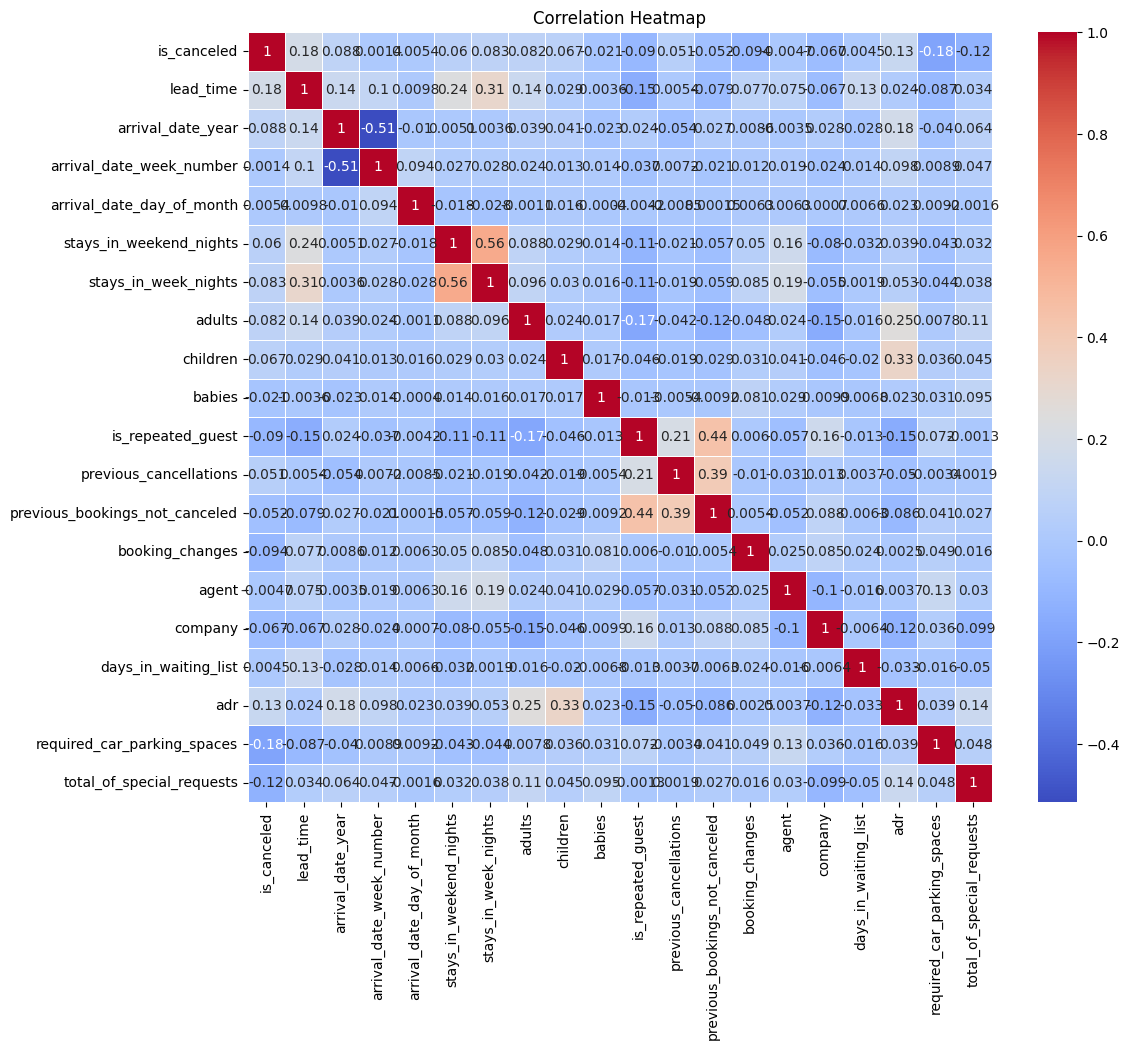

In [41]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation values
print("Correlation Matrix:\n", corr_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Bar Graph**

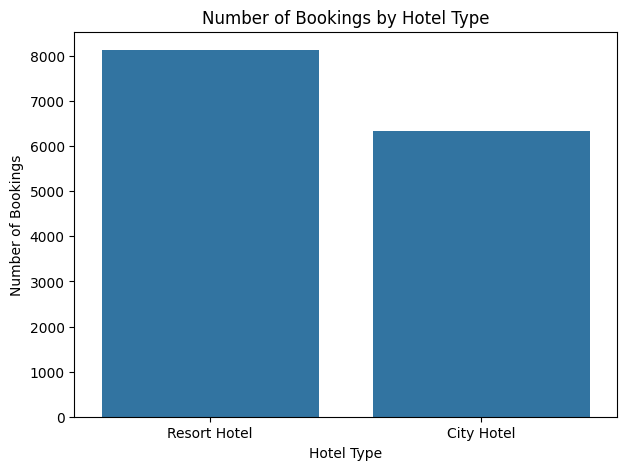

In [ ]:
#showing count of hotel type
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='hotel')
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

**Histogram**

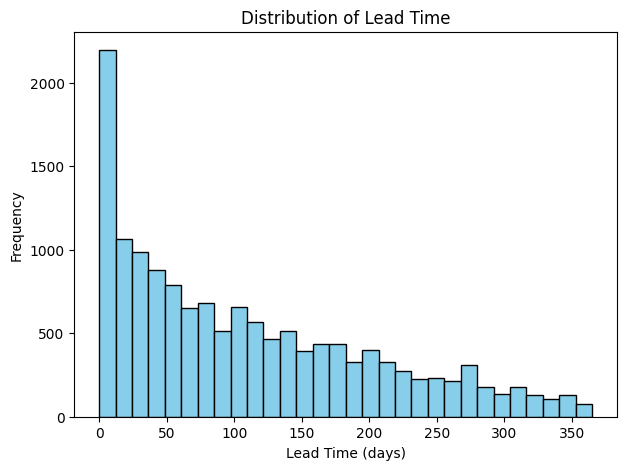

In [ ]:
#shows distribution of lead time
plt.figure(figsize=(7,5))
plt.hist(df['lead_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()